In [4]:
# Import Dependencies
import pandas as pd
import numpy as np  
import csv 
import datetime as dt

#Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

#To plot the graph embedded in the notebook
%matplotlib inline

# Machine Learning dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# PREDICT 1 BDR HOUSE PRICES IN NORTH CAROLINA

In [5]:
# Read in the dataset for 1 bedroom house price prediction
nc_1bdr_final = pd.read_csv('./static/data/rw_nc_1bdr_final.csv')
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,Winterville,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


In [ ]:
# Check distribution of house prices
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(nc_1bdr_final['avg_house_price'], bins=10, color="purple")
plt.xlabel("1 BDR House prices in North Carolina (USD)")
plt.savefig('./static/images/PriceDistribution_1bdr.png')
plt.show()

In [ ]:
#Take logarithm of the target variable to make it more symetrical

sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.hist(np.log(nc_1bdr_final['avg_house_price']), bins=10, color="purple")
plt.xlabel("log(1 BDR House prices in North Carolina (USD)")
plt.ylabel("Number of Houses")
plt.title("1 BDR House Prices Distribution in North Carolina")
plt.savefig('./static/images/LogPriceDistribution_1bdr.png')
plt.show()

In [ ]:
print(f"Skew (1BDR) is:", nc_1bdr_final['avg_house_price'].skew())
print(f"Kurtosis (1BDR): %f" % nc_1bdr_final['avg_house_price'].kurt())

print(f"Skew (log 1BDR ) is:", np.log(nc_1bdr_final['avg_house_price']).skew())
print(f"Kurtosis (log 1BDR): %f" % np.log(nc_1bdr_final['avg_house_price']).kurt())

In [ ]:
#Converting house Price to log value
nc_1bdr_log = nc_1bdr_final
nc_1bdr_log.avg_house_price = np.log(nc_1bdr_log.avg_house_price)
nc_1bdr_log

In [ ]:
# Created a df without price to check coorelation among features
nc_1bdr_log_explore = nc_1bdr_log[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_1bdr_log_explore

In [ ]:
#check coorelation among features using seaborn library
nc_1bdr_log_corr_matrix = nc_1bdr_log_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_1bdr_log_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/LogCorrelation Matrix_1bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [ ]:
plt.figure(figsize=(12,7))
sns.stripplot(x = nc_1bdr_final["city"], 
              y = nc_1bdr_final["avg_house_price"],
              order = np.sort(nc_1bdr_final["city"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

In [ ]:
plt.figure(figsize=(20,7))
sns.stripplot(x = nc_1bdr_final["zipcode"], 
              y = nc_1bdr_final["avg_house_price"],
              order = np.sort(nc_1bdr_final["zipcode"].unique()),
              jitter=0.1, alpha=0.5)
 
plt.xticks(rotation=45)

In [ ]:
# Created a df without price to check coorelation among features
nc_1bdr_explore = nc_1bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_1bdr_explore

In [ ]:
# Hot encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
#New variable for outlet
var_mod = ["city", "zipcode"]
for i in var_mod:
    nc_1bdr_final[i] = le.fit_transform(nc_1bdr_final[i])
#Dummy Variables:
nc_1bdr_final = pd.get_dummies(nc_1bdr_final, columns = var_mod)
nc_1bdr_final

In [ ]:
nc_1bdr_final.dtypes

In [ ]:
#check coorelation among features using seaborn library
nc_1bdr_corr_matrix = nc_1bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_1bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_1bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [ ]:
features = nc_1bdr_final[['number_of_schools', 'population']]
target = nc_1bdr_final[['avg_house_price']]

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = nc_1bdr_final[col]
    y = target
    
plt.scatter(x,y, c="purple", marker='o')

plt.title("Variation in House prices")
plt.xlabel(col)
plt.ylabel('"House prices"')

In [6]:
# Created a df without price to check coorelation among features
nc_1bdr_explore = nc_1bdr_final[["city","zipcode", "number_of_schools", "population", "poverty_count", "median_household_income", "poverty_rate"]]
nc_1bdr_explore

,city,zipcode,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...
401,Winterville,28590,5,24613.0,2747.0,65594.0,11.160769
402,Wrightsville Beach,28480,1,2536.0,216.0,83417.0,8.517350
403,Youngsville,27596,3,18359.0,1624.0,70535.0,8.845798
404,Zebulon,27597,5,23538.0,2995.0,58514.0,12.724106


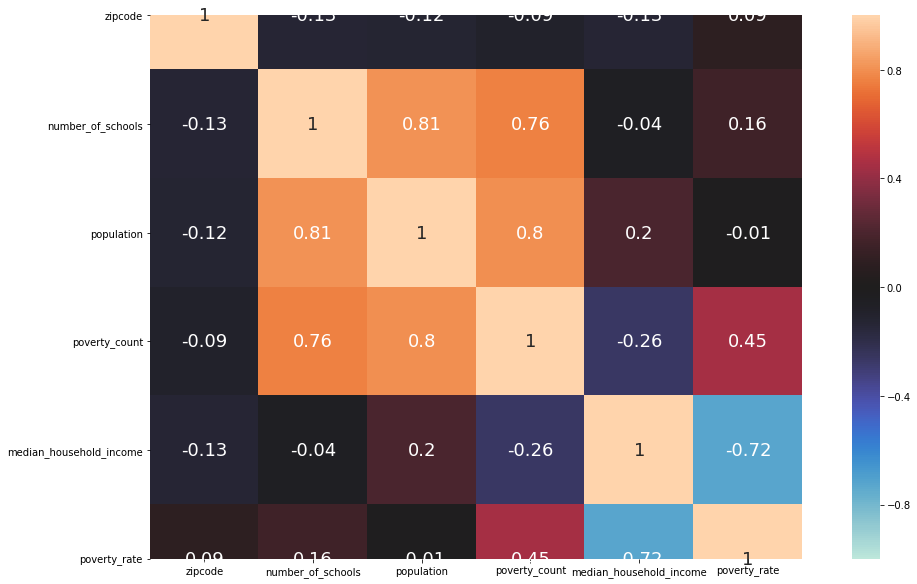

In [34]:
#check coorelation among features using seaborn library
nc_1bdr_corr_matrix = nc_1bdr_explore.corr().round(2)

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(data=nc_1bdr_corr_matrix, 
            annot=True, 
            annot_kws={"size": 18},
            vmin=-1, vmax=1, center= 0, 
            square=True,
            ax=ax,)

# Save Plot
plt.savefig('./static/images/Correlation Matrix_1bdr.png')


# The correlation coefficient ranges from -1 to 1. 
# If the value is close to 1, the variables have a strong positive correlation  
# When it is close to -1, the variables have a strong negative correlation

In [44]:
# Convert City to a cetegorical variable
nc_1bdr_final["city"] = nc_1bdr_final["city"].astype('category')
nc_1bdr_final["city"] = nc_1bdr_final["city"].cat.codes
nc_1bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,114560.250000,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,117300.225275,2,14555.0,932.0,78095.0,6.403298
2,2,28001,35063.496599,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,126763.427083,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,370912.251938,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
401,298,28590,57159.475000,5,24613.0,2747.0,65594.0,11.160769
402,299,28480,274212.242424,1,2536.0,216.0,83417.0,8.517350
403,300,27596,100356.464865,3,18359.0,1624.0,70535.0,8.845798
404,301,27597,114133.758865,5,23538.0,2995.0,58514.0,12.724106


In [45]:
# Define dependent and independent variables
X_1bdr = nc_1bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_1bdr = nc_1bdr_final["avg_house_price"].values.reshape(-1,1)

In [46]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_1bdr, X_test_1bdr, y_train_1bdr, y_test_1bdr = train_test_split(X_1bdr, y_1bdr, random_state=42)

In [47]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_1bdr = LinearRegression()

In [48]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_1bdr.fit(X_train_1bdr, y_train_1bdr)
training_score_1bdr = model_1bdr.score(X_train_1bdr, y_train_1bdr)
testing_score_1bdr = model_1bdr.score(X_test_1bdr, y_test_1bdr)

# Print Scores
print(f"1 BDR Training Score: {training_score_1bdr}")
print(f"1 BDR Testing Score: {testing_score_1bdr}")

1 BDR Training Score: 0.3235276492851916
1 BDR Testing Score: 0.2442871652890961


1 BDR Mean Squared Error (MSE): 2156207420.2401605
1 BDR R-squared (R2 ): 0.2442871652890961


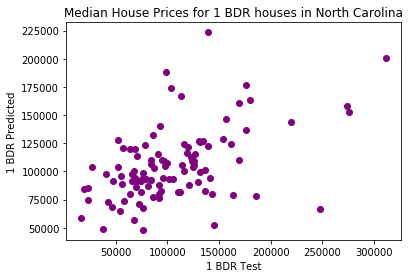

In [49]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_1bdr = model_1bdr.predict(X_test_1bdr)

# Score the predictions with mse and r2
mse_1bdr = mean_squared_error(y_test_1bdr, predicted_1bdr)
r2_1bdr = r2_score(y_test_1bdr, predicted_1bdr)
print(f"1 BDR Mean Squared Error (MSE): {mse_1bdr}")
print(f"1 BDR R-squared (R2 ): {r2_1bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_1bdr,predicted_1bdr, c="purple")

# Label plot
plt.xlabel('1 BDR Test')
plt.ylabel('1 BDR Predicted')

plt.title('Median House Prices for 1 BDR houses in North Carolina')

# Save Plot
plt.savefig('./static/images/LinearRegression_1bdr.png')

# Show plot
plt.show()

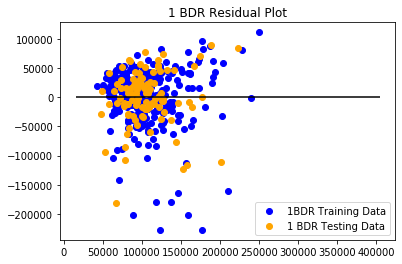

In [50]:
plt.scatter(model_1bdr.predict(X_train_1bdr), model_1bdr.predict(X_train_1bdr) - y_train_1bdr, c="blue", label="1BDR Training Data")

plt.scatter(model_1bdr.predict(X_test_1bdr), model_1bdr.predict(X_test_1bdr) - y_test_1bdr, c="orange", label="1 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_1bdr.min(), xmax=y_1bdr.max())

plt.title("1 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_1bdr.png')

# PREDICT 2 BDR HOUSE PRICES IN NORTH CAROLINA

In [51]:
# Read in the dataset for 2 bedroom house price prediction
nc_2bdr_final = pd.read_csv('./static/data/rw_nc_2bdr_final.csv')
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,Wrightsville Beach,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,Yadkinville,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,Youngsville,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,Zebulon,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


In [52]:
# Convert City to a cetegorical variable
nc_2bdr_final["city"] = nc_2bdr_final["city"].astype('category')
nc_2bdr_final["city"] = nc_2bdr_final["city"].cat.codes
nc_2bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,99995.515789,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,132251.410811,2,14555.0,932.0,78095.0,6.403298
2,2,28001,58202.006803,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,101196.766667,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,155699.619863,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
491,371,28480,603578.373626,1,2536.0,216.0,83417.0,8.517350
492,372,27055,86084.994565,4,14131.0,1855.0,44574.0,13.127167
493,373,27596,139581.902703,3,18359.0,1624.0,70535.0,8.845798
494,374,27597,103068.200692,5,23538.0,2995.0,58514.0,12.724106


In [53]:
# Define dependent and independent variables
X_2bdr = nc_2bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_2bdr = nc_2bdr_final["avg_house_price"].values.reshape(-1,1)

In [54]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_2bdr, X_test_2bdr, y_train_2bdr, y_test_2bdr = train_test_split(X_2bdr, y_2bdr, random_state=42)

In [55]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_2bdr = LinearRegression()

In [56]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_2bdr.fit(X_train_2bdr, y_train_2bdr)
training_score_2bdr = model_2bdr.score(X_train_2bdr, y_train_2bdr)
testing_score_2bdr = model_2bdr.score(X_test_2bdr, y_test_2bdr)

# Print Scores
print(f"2 BDR Training Score: {training_score_2bdr}")
print(f"2 BDR Testing Score: {testing_score_2bdr}")

2 BDR Training Score: 0.26352685417014954
2 BDR Testing Score: 0.10755401092794925


2 BDR Mean Squared Error (MSE): 3522327741.2831326
2 BDR R-squared (R2): 0.10755401092794925


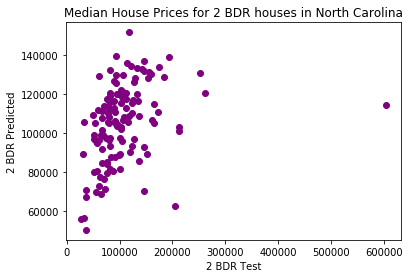

In [57]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_2bdr = model_2bdr.predict(X_test_2bdr)

# Score the predictions with mse and r2
mse_2bdr = mean_squared_error(y_test_2bdr, predicted_2bdr)
r2_2bdr = r2_score(y_test_2bdr, predicted_2bdr)
print(f"2 BDR Mean Squared Error (MSE): {mse_2bdr}")
print(f"2 BDR R-squared (R2): {r2_2bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_2bdr,predicted_2bdr, c="purple")

# Label plot
plt.xlabel('2 BDR Test')
plt.ylabel('2 BDR Predicted')

plt.title('Median House Prices for 2 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_2bdr.png')

# Show plot
plt.show()

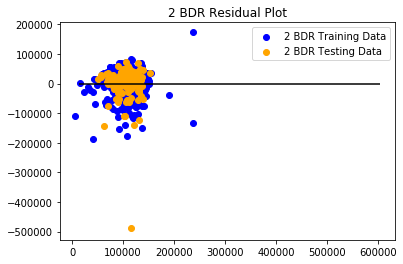

In [58]:
plt.scatter(model_2bdr.predict(X_train_2bdr), model_2bdr.predict(X_train_2bdr) - y_train_2bdr, c="blue", label="2 BDR Training Data")

plt.scatter(model_2bdr.predict(X_test_2bdr), model_2bdr.predict(X_test_2bdr) - y_test_2bdr, c="orange", label="2 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_2bdr.min(), xmax=y_2bdr.max())

plt.title("2 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_2bdr.png')

# PREDICT 3 BDR HOUSE PRICES IN NORTH CAROLINA

In [59]:
# Read in the dataset for 3 bedroom house price prediction
nc_3bdr_final = pd.read_csv('./static/data/rw_nc_3bdr_final.csv')
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,Wrightsville Beach,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,Yadkinville,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,Youngsville,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,Zebulon,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


In [60]:
# Convert City to a cetegorical variable
nc_3bdr_final["city"] = nc_3bdr_final["city"].astype('category')
nc_3bdr_final["city"] = nc_3bdr_final["city"].cat.codes
nc_3bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,152390.688776,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,203515.118280,2,14555.0,932.0,78095.0,6.403298
2,2,28001,112205.683673,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,137745.621528,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,215726.292517,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
498,378,28480,867084.654762,1,2536.0,216.0,83417.0,8.517350
499,379,27055,122836.272727,4,14131.0,1855.0,44574.0,13.127167
500,380,27596,165427.655290,3,18359.0,1624.0,70535.0,8.845798
501,381,27597,147983.479592,5,23538.0,2995.0,58514.0,12.724106


In [61]:
# Define dependent and independent variables
X_3bdr = nc_3bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_3bdr = nc_3bdr_final["avg_house_price"].values.reshape(-1,1)

In [62]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_3bdr, X_test_3bdr, y_train_3bdr, y_test_3bdr = train_test_split(X_3bdr, y_3bdr, random_state=42)

In [63]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_3bdr = LinearRegression()

In [64]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_3bdr.fit(X_train_3bdr, y_train_3bdr)
training_score_3bdr = model_3bdr.score(X_train_3bdr, y_train_3bdr)
testing_score_3bdr = model_3bdr.score(X_test_3bdr, y_test_3bdr)

# Print Scores
print(f"3 BDR Training Score: {training_score_3bdr}")
print(f"3 BDR Testing Score: {testing_score_3bdr}")

3 BDR Training Score: 0.23322728490457656
3 BDR Testing Score: 0.1300253333028838


3 BDR Mean Squared Error (MSE): 7976588280.516898
3 BDR R-squared (R2): 0.1300253333028838


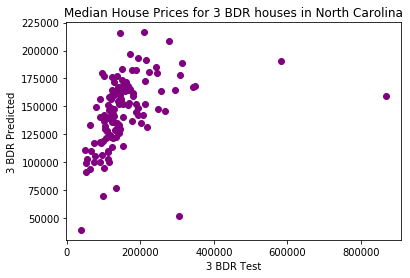

In [65]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_3bdr = model_3bdr.predict(X_test_3bdr)

# Score the predictions with mse and r2
mse_3bdr = mean_squared_error(y_test_3bdr, predicted_3bdr)
r2_3bdr = r2_score(y_test_3bdr, predicted_3bdr)
print(f"3 BDR Mean Squared Error (MSE): {mse_3bdr}")
print(f"3 BDR R-squared (R2): {r2_3bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_3bdr,predicted_3bdr, c="purple")

# Label plot
plt.xlabel('3 BDR Test')
plt.ylabel('3 BDR Predicted')

plt.title('Median House Prices for 3 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_3bdr.png')

# Show plot
plt.show()

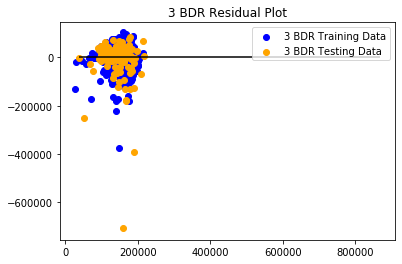

In [66]:
plt.scatter(model_3bdr.predict(X_train_3bdr), model_3bdr.predict(X_train_3bdr) - y_train_3bdr, c="blue", label="3 BDR Training Data")

plt.scatter(model_3bdr.predict(X_test_3bdr), model_3bdr.predict(X_test_3bdr) - y_test_3bdr, c="orange", label="3 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_3bdr.min(), xmax=y_3bdr.max())

plt.title("3 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_3bdr.png')

# PREDICT 4 BDR HOUSE PRICES IN NORTH CAROLINA

In [110]:
# Read in the dataset for 4 bedroom house price prediction
nc_4bdr_final = pd.read_csv('./static/data/rw_nc_4bdr_final.csv')
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,Wrightsville Beach,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,Yadkinville,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,Youngsville,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,Zebulon,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


In [111]:
# Convert City to a cetegorical variable
nc_4bdr_final["city"] = nc_4bdr_final["city"].astype('category')
nc_4bdr_final["city"] = nc_4bdr_final["city"].cat.codes
nc_4bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,2.160320e+05,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,3.221646e+05,2,14555.0,932.0,78095.0,6.403298
2,2,28001,1.612910e+05,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,2.092624e+05,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,2.822962e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
497,377,28480,1.119684e+06,1,2536.0,216.0,83417.0,8.517350
498,378,27055,1.691515e+05,4,14131.0,1855.0,44574.0,13.127167
499,379,27596,2.375439e+05,3,18359.0,1624.0,70535.0,8.845798
500,380,27597,2.076993e+05,5,23538.0,2995.0,58514.0,12.724106


In [112]:
# # Perform Binary encoding using Pandas get_dummies to convert categorical data (City and Zipcode)
# binary_encoded_nc_4bdr = pd.get_dummies(nc_4bdr, columns=["city", "zipcode"])
# binary_encoded_nc_4bdr

In [113]:
# Define dependent and independent variables
# X_4bdr = binary_encoded_nc_4bdr[["population","median_household_income", "number_of_schools", "poverty_rate"]]
# y_4bdr = binary_encoded_nc_4bdr["avg_house_price"].values.reshape(-1,1)

In [114]:
# Define dependent and independent variables
X_4bdr = nc_4bdr_final[["city", "population","median_household_income", "number_of_schools", "poverty_rate"]]
y_4bdr = nc_4bdr_final["avg_house_price"].values.reshape(-1,1)

In [115]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_4bdr, X_test_4bdr, y_train_4bdr, y_test_4bdr = train_test_split(X_4bdr, y_4bdr, random_state=42)

In [104]:
# Create a StandardScater model and fit it to the training data

# from sklearn.preprocessing import StandardScaler

# X_4bdr_scaler = StandardScaler().fit(X_train_4bdr)
# y_4bdr_scaler = StandardScaler().fit(y_train_4bdr)

In [105]:
# Transform the training and testing data using the X_scaler and y_scaler models
# X_train_4bdr_scaled = X_4bdr_scaler.transform(X_train_4bdr)
# X_test_4bdr_scaled = X_4bdr_scaler.transform(X_test_4bdr)
# y_train_4bdr_scaled = y_4bdr_scaler.transform(y_train_4bdr)
# y_test_4bdr_scaled = y_4bdr_scaler.transform(y_test_4bdr)

In [116]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_4bdr = LinearRegression()

In [117]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_4bdr.fit(X_train_4bdr, y_train_4bdr)

training_score_4bdr = model_4bdr.score(X_train_4bdr, y_train_4bdr)
testing_score_4bdr = model_4bdr.score(X_test_4bdr, y_test_4bdr)


# model_4bdr.fit(X_train_4bdr_scaled, y_train_4bdr_scaled)

# training_score_4bdr = model_4bdr.score(X_train_4bdr_scaled, y_train_4bdr_scaled)
# testing_score_4bdr = model_4bdr.score(X_test_4bdr_scaled, y_test_4bdr_scaled)

# Print Scores
print(f"4 BDR Training Score: {training_score_4bdr}")
print(f"4 BDR Testing Score: {testing_score_4bdr}")

4 BDR Training Score: 0.3128664540388225
4 BDR Testing Score: -1217421.1375908374


4 BDR Mean Squared Error (MSE): 2.3028406542082344e+16
4 BDR R-squared (R2): -1217421.1375908374


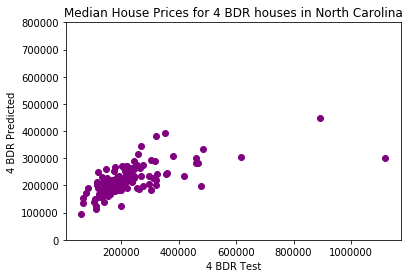

In [118]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_4bdr = model_4bdr.predict(X_test_4bdr)
# predicted_4bdr = model_4bdr.predict(X_test_4bdr_scaled)

# Score the predictions with mse and r2
mse_4bdr = mean_squared_error(y_test_4bdr, predicted_4bdr)
r2_4bdr = r2_score(y_test_4bdr, predicted_4bdr)

# mse_4bdr = mean_squared_error(y_test_4bdr_scaled, predicted_4bdr)
# r2_4bdr = r2_score(y_test_4bdr_scaled, predicted_4bdr)


print(f"4 BDR Mean Squared Error (MSE): {mse_4bdr}")
print(f"4 BDR R-squared (R2): {r2_4bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_4bdr,predicted_4bdr, c="purple")
# plt.scatter(y_test_4bdr_scaled,predicted_4bdr, c="purple")

# Label plot
plt.xlabel('4 BDR Test')
plt.ylabel('4 BDR Predicted')

plt.ylim(-3,800000)

plt.title('Median House Prices for 4 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_4bdr.png')

# Show plot
plt.show()

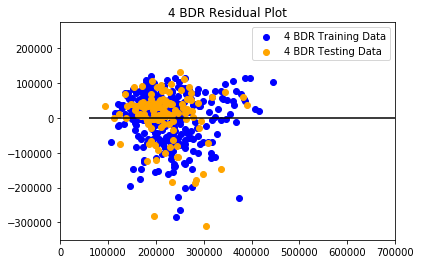

In [119]:
plt.scatter(model_4bdr.predict(X_train_4bdr), model_4bdr.predict(X_train_4bdr) - y_train_4bdr, c="blue", label="4 BDR Training Data")

plt.scatter(model_4bdr.predict(X_test_4bdr), model_4bdr.predict(X_test_4bdr) - y_test_4bdr, c="orange", label="4 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_4bdr.min(), xmax=y_4bdr.max())

plt.title("4 BDR Residual Plot")
plt.ylim(-350000, 275000)
plt.xlim(0, 700000)

plt.savefig('./static/images/Residual Plot_4bdr.png')

# PREDICT 5 BDR HOUSE PRICES IN NORTH CAROLINA

In [78]:
# Read in the dataset for 5 bedroom house price prediction
nc_5bdr_final = pd.read_csv('./static/data/rw_nc_5bdr_final.csv')
nc_5bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,Aberdeen,28315,2.566661e+05,4,13700.0,2826.0,51725.0,20.627737
1,Advance,27006,4.206142e+05,2,14555.0,932.0,78095.0,6.403298
2,Albemarle,28001,1.938330e+05,8,26601.0,5208.0,45121.0,19.578211
3,Angier,27501,2.580105e+05,5,21299.0,2601.0,56338.0,12.211841
4,Apex,27502,3.770457e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
466,Wrightsville Beach,28480,1.574379e+06,1,2536.0,216.0,83417.0,8.517350
467,Yadkinville,27055,2.390520e+05,4,14131.0,1855.0,44574.0,13.127167
468,Youngsville,27596,2.908075e+05,3,18359.0,1624.0,70535.0,8.845798
469,Zebulon,27597,2.288464e+05,5,23538.0,2995.0,58514.0,12.724106


In [79]:
# Convert City to a cetegorical variable
nc_5bdr_final["city"] = nc_5bdr_final["city"].astype('category')
nc_5bdr_final["city"] = nc_5bdr_final["city"].cat.codes
nc_5bdr_final

,city,zipcode,avg_house_price,number_of_schools,population,poverty_count,median_household_income,poverty_rate
0,0,28315,2.566661e+05,4,13700.0,2826.0,51725.0,20.627737
1,1,27006,4.206142e+05,2,14555.0,932.0,78095.0,6.403298
2,2,28001,1.938330e+05,8,26601.0,5208.0,45121.0,19.578211
3,3,27501,2.580105e+05,5,21299.0,2601.0,56338.0,12.211841
4,4,27502,3.770457e+05,7,40280.0,2248.0,110513.0,5.580933
...,...,...,...,...,...,...,...,...
466,347,28480,1.574379e+06,1,2536.0,216.0,83417.0,8.517350
467,348,27055,2.390520e+05,4,14131.0,1855.0,44574.0,13.127167
468,349,27596,2.908075e+05,3,18359.0,1624.0,70535.0,8.845798
469,350,27597,2.288464e+05,5,23538.0,2995.0,58514.0,12.724106


In [80]:
# Define dependent and independent variables
X_5bdr = nc_5bdr_final[["city","population","median_household_income", "number_of_schools", "poverty_rate"]]
y_5bdr = nc_5bdr_final["avg_house_price"].values.reshape(-1,1)

In [81]:
# Split data into train and test data
from sklearn.model_selection import train_test_split
X_train_5bdr, X_test_5bdr, y_train_5bdr, y_test_5bdr = train_test_split(X_5bdr, y_5bdr, random_state=42)

In [82]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model_5bdr = LinearRegression()

In [83]:
# Fit the model to the training data and calculate the scores for the training and testing data
model_5bdr.fit(X_train_5bdr, y_train_5bdr)
training_score_5bdr = model_5bdr.score(X_train_5bdr, y_train_5bdr)
testing_score_5bdr = model_5bdr.score(X_test_5bdr, y_test_5bdr)

# Print Scores
print(f"5 BDR Training Score: {training_score_5bdr}")
print(f"5 BDR Testing Score: {testing_score_5bdr}")

5 BDR Training Score: 0.2688639753862858
5 BDR Testing Score: -1960596.9659736298


5 BDR Mean Squared Error (MSE): 6.794882546573976e+16
5 BDR R-squared (R2): -1960596.9659736298


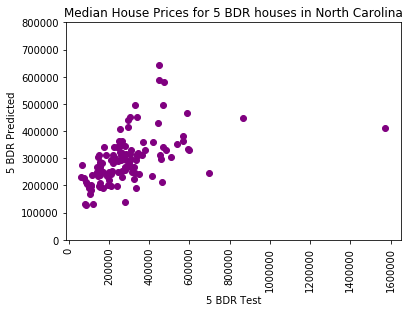

In [84]:
# Calculate the mean_squared_error and the r-squared value for the testing data
from sklearn.metrics import mean_squared_error, r2_score

# Use the model to make predictions
predicted_5bdr = model_5bdr.predict(X_test_5bdr)

# Score the predictions with mse and r2
mse_5bdr = mean_squared_error(y_test_5bdr, predicted_5bdr)
r2_5bdr = r2_score(y_test_5bdr, predicted_5bdr)
print(f"5 BDR Mean Squared Error (MSE): {mse_5bdr}")
print(f"5 BDR R-squared (R2): {r2_5bdr}")

#Plot the Predicted house prices
plt.scatter(y_test_5bdr,predicted_5bdr, c="purple")

# Label plot
plt.xlabel('5 BDR Test')
plt.ylabel('5 BDR Predicted')

plt.xticks(rotation=90)
plt.ylim(-3,800000)

plt.title('Median House Prices for 5 BDR houses in North Carolina')

plt.savefig('./static/images/LinearRegression_5bdr.png')

# Show plot
plt.show()

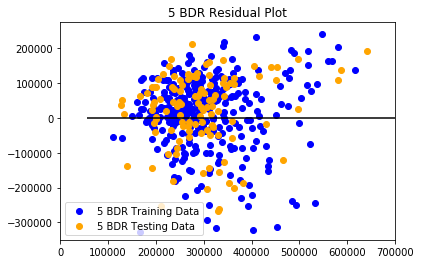

In [85]:
plt.scatter(model_5bdr.predict(X_train_5bdr), model_5bdr.predict(X_train_5bdr) - y_train_5bdr, c="blue", label="5 BDR Training Data")

plt.scatter(model_5bdr.predict(X_test_5bdr), model_5bdr.predict(X_test_5bdr) - y_test_5bdr, c="orange", label="5 BDR Testing Data")

plt.legend()

plt.hlines(y=0, xmin=y_5bdr.min(), xmax=y_5bdr.max())

plt.ylim(-350000, 275000)
plt.xlim(0, 700000)

plt.title("5 BDR Residual Plot")
plt.savefig('./static/images/Residual Plot_5bdr.png')